In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
TRAIN_PATH = './car_data/cars_tanks/train'
TEST_PATH = './car_data/cars_tanks/test'


In [5]:
import os

print("Train folders:", os.listdir(TRAIN_PATH))
print("Test folders:", os.listdir(TEST_PATH))


Train folders: ['cars', 'tanks']
Test folders: ['cars', 'tanks']


In [ ]:

IMG_SIZE = 300
BATCH_SIZE = 32


In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:


train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 1303 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [11]:
data_name = list(train_generator.class_indices.keys())

In [12]:
data_name

['cars', 'tanks']

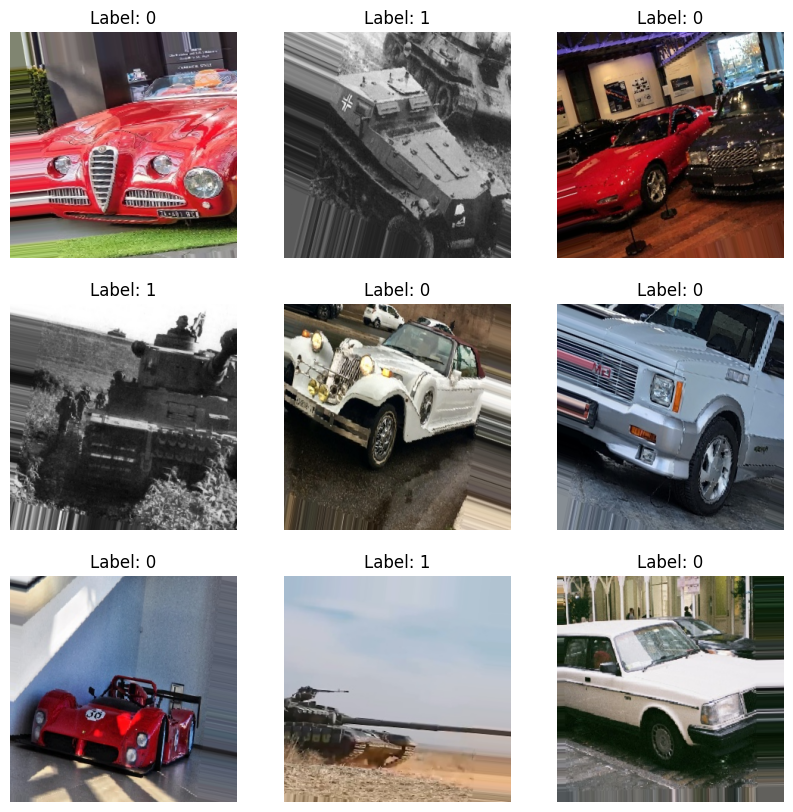

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


sample_batch = next(train_generator)

# Lấy hình ảnh và nhãn từ batch
images, labels = sample_batch


num_images = 9
images = images[:num_images]
labels = labels[:num_images]


plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"Label: {np.argmax(labels[i])}")
    plt.axis('off')

plt.show()


In [14]:
# Lấy số lượng lớp
num_classes = len(train_generator.class_indices)


In [ ]:

base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')


base_model.trainable = False


model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


model.build(input_shape=(None, IMG_SIZE, IMG_SIZE, 3))


optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

C:\Users\dell\AppData\Local\Temp\ipykernel_41276\3574431830.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 10, 10, 1280)   │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,571,778 (13.63 MB)

 Trainable params: 1,313,794 (5.01 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

c:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 161s 4s/step - accuracy: 0.7940 - loss: 0.4050 - val_accuracy: 0.9700 - val_loss: 0.0801
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.9706 - loss: 0.0850 - val_accuracy: 0.9700 - val_loss: 0.0647
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.9855 - loss: 0.0538 - val_accuracy: 0.9750 - val_loss: 0.0597
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.9822 - loss: 0.0536 - val_accuracy: 0.9800 - val_loss: 0.0613
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - accuracy: 0.9930 - loss: 0.0370 - val_accuracy: 0.9750 - val_loss: 0.0528
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step - accuracy: 0.9802 - loss: 0.0492 - val_accuracy: 0.9700 - val_loss: 0.0498
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.9826 - loss: 0.0419 - val_accuracy: 0.9800 - val_loss: 0.0493
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.9837 - loss: 0.0339 - val_accuracy: 0.9700 - v

7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9835 - loss: 0.0422
Test accuracy: 0.9800000190734863


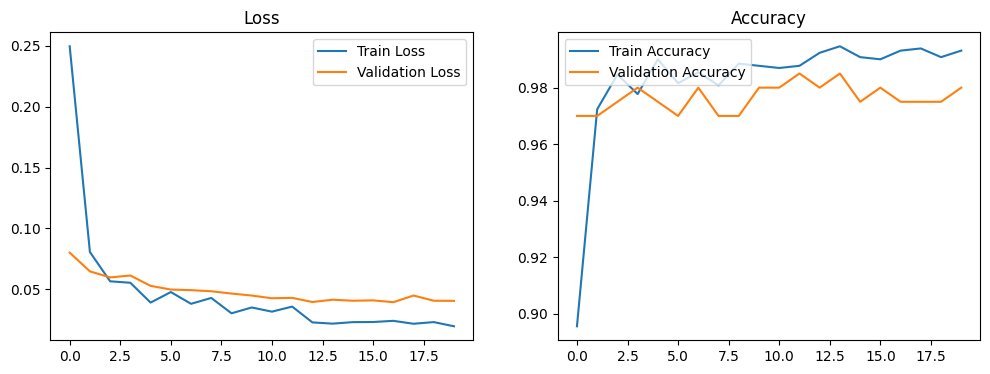

In [17]:

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.show()


Found 200 images belonging to 2 classes.
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step


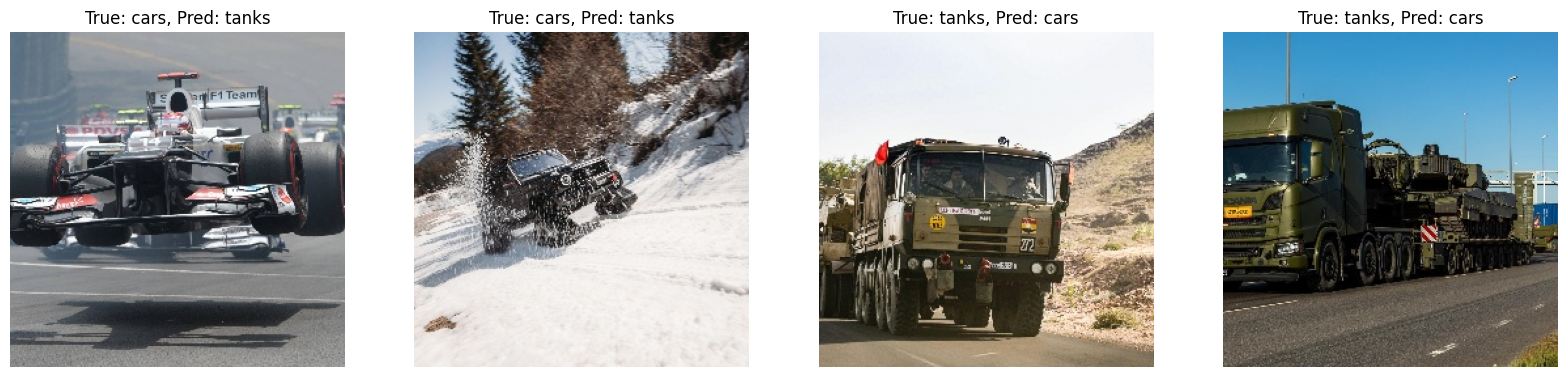

In [20]:
import matplotlib.pyplot as plt


test_generator_reset = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


predictions = model.predict(test_generator_reset)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_reset.classes
class_labels = list(test_generator_reset.class_indices.keys())

# Tìm các mẫu ảnh mà mô hình dự đoán sai
incorrect_indices = np.where(predicted_classes != true_classes)[0]


plt.figure(figsize=(20, 20))
for i, idx in enumerate(incorrect_indices):  # Hiển thị mẫu ảnh dự đoán sai
    plt.subplot(4, 4, i + 1)
    img = plt.imread(test_generator_reset.filepaths[idx])
    plt.imshow(img)
    plt.title(f"True: {class_labels[true_classes[idx]]}, Pred: {class_labels[predicted_classes[idx]]}")
    plt.axis('off')
plt.show()

In [ ]:
model.save('image_classification_carscars.h5') 